## Data and Visualizations

In [1]:
#All tools and imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import itertools
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [2]:
#import CSV data file
bird_data = pd.read_csv('.\capstone_data\capstonebirds.csv', index_col=0)

#Array of unique labels
labels = list(bird_data["labels"].unique())
print(labels)

#display CSV data file
display(bird_data)

['BALD EAGLE', 'GOLDEN EAGLE', 'RED TAILED HAWK']


,filepaths,labels,data set,scientific name
class id,,,,
0,train/BALD EAGLE/001.jpg,BALD EAGLE,train,Haliaeetus leucocephalus
0,train/BALD EAGLE/002.jpg,BALD EAGLE,train,Haliaeetus leucocephalus
0,train/BALD EAGLE/003.jpg,BALD EAGLE,train,Haliaeetus leucocephalus
0,train/BALD EAGLE/004.jpg,BALD EAGLE,train,Haliaeetus leucocephalus
0,train/BALD EAGLE/005.jpg,BALD EAGLE,train,Haliaeetus leucocephalus
...,...,...,...,...
2,valid/RED TAILED HAWK/1.jpg,RED TAILED HAWK,valid,Buteo jamaicensis
2,valid/RED TAILED HAWK/2.jpg,RED TAILED HAWK,valid,Buteo jamaicensis
2,valid/RED TAILED HAWK/3.jpg,RED TAILED HAWK,valid,Buteo jamaicensis


In [3]:
#Directories of images and paths

#Directory of all training, validation and testing images
bird_train_directory = r'.\capstone_data\train'
bird_valid_directory = r'.\capstone_data\valid'
bird_test_directory = r'.\capstone_data\test'

#Directory with training bald eagle pictures
baldeagle_train_dir = os.path.join(bird_train_directory + '\BALD EAGLE')
#File names
train_baldeagle_names = os.listdir(baldeagle_train_dir)

#Directory with training golden eagle pictures
goldeneagle_train_dir = os.path.join(bird_train_directory + '\GOLDEN EAGLE')
#File names
train_goldeneagle_names = os.listdir(goldeneagle_train_dir)

#Directory with training red tailed hawk pictures
redtailedhawk_train_dir = os.path.join(bird_train_directory + '\RED TAILED HAWK')
#File names
train_redtailedhawk_names = os.listdir(redtailedhawk_train_dir)


#Directory with testing Bald Eagle pictures
baldeagle_test_dir = os.path.join(bird_test_directory + '\BALD EAGLE')
#File names
test_baldeagle_names = os.listdir(baldeagle_test_dir)

#Directory with testing Golden Eagle pictures
goldeneagle_test_dir = os.path.join(bird_test_directory + '\GOLDEN EAGLE')
#File names
test_goldeneagle_names = os.listdir(goldeneagle_test_dir)

#Directory with testing Red Tailed Hawk pictures
redtailedhawk_test_dir = os.path.join(bird_test_directory + '\RED TAILED HAWK')
#File names
test_redtailedhawk_names = os.listdir(redtailedhawk_test_dir)

Bald Eagle Pictures



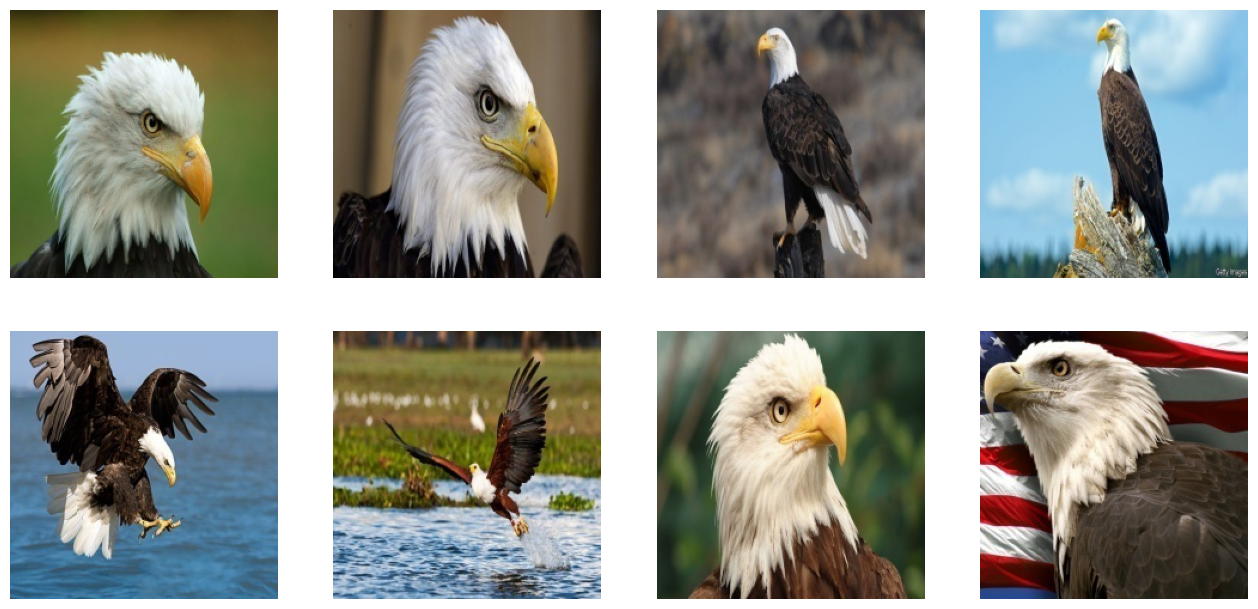

Golden Eagle Pictures



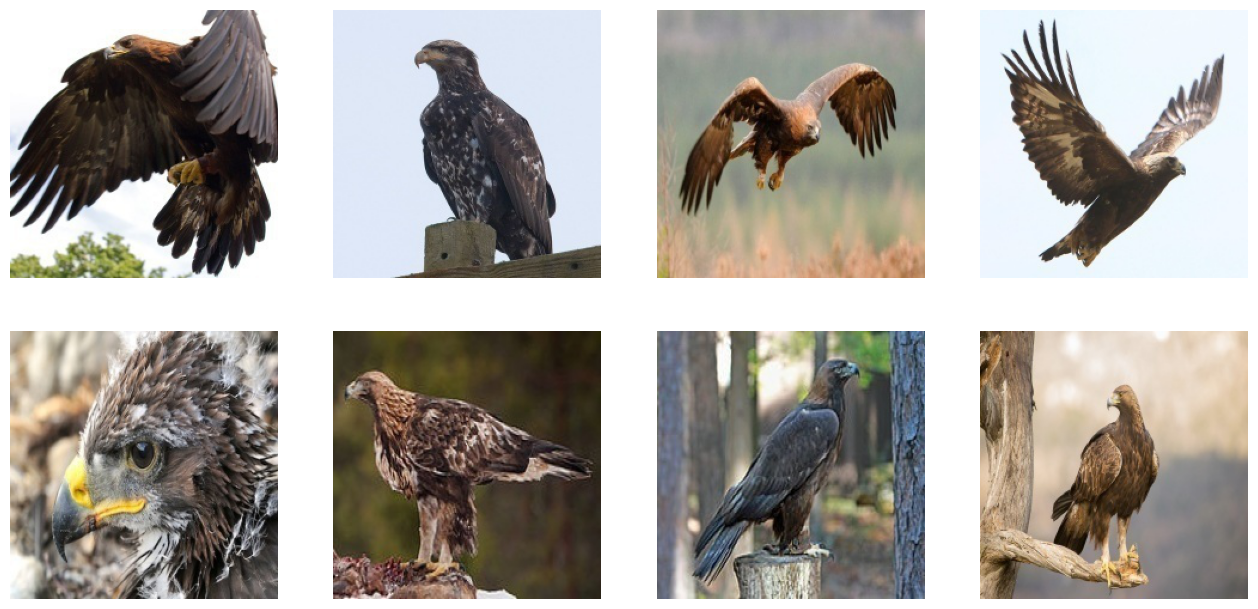

Red Tailed Hawk Pictures



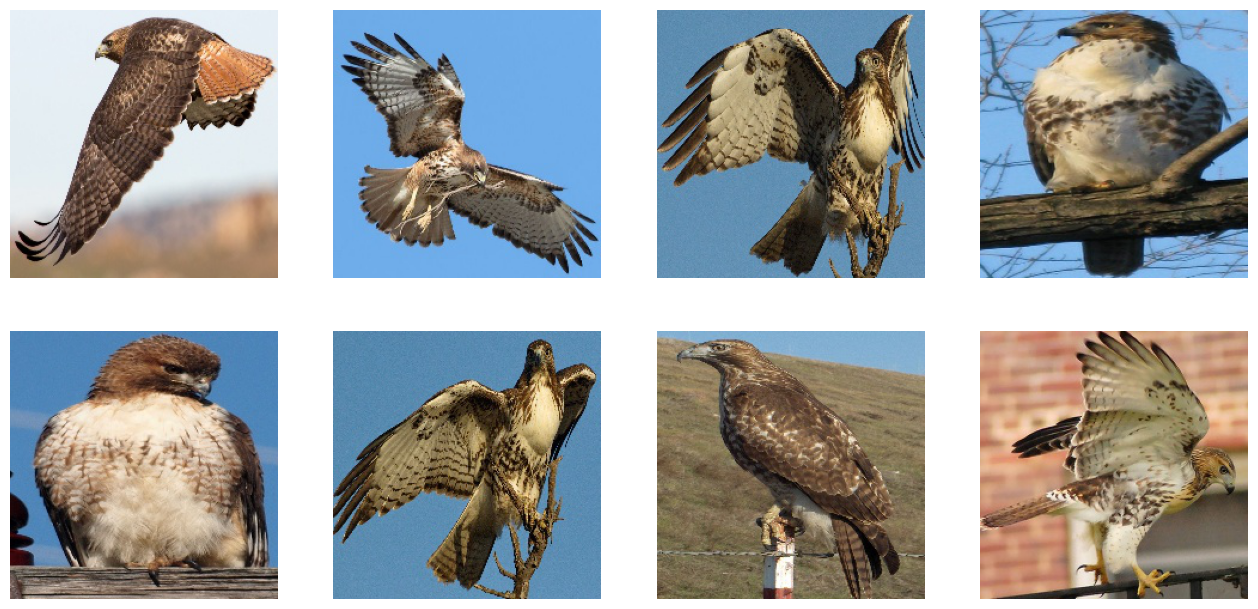

In [4]:
#Graph parameters to display image examples
nrows = 4
ncols = 4

#Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
#Arrays to hold images
next_baldeagle_pic = [os.path.join(baldeagle_train_dir, fname) 
                for fname in train_baldeagle_names[pic_index-8:pic_index]]
next_goldeneagle_pic = [os.path.join(goldeneagle_train_dir, fname) 
                for fname in train_goldeneagle_names[pic_index-8:pic_index]]
next_redtailedhawk_pic = [os.path.join(redtailedhawk_train_dir, fname) 
                for fname in train_redtailedhawk_names[pic_index-8:pic_index]]

print ("Bald Eagle Pictures")
print()
for i, img_path in enumerate(next_baldeagle_pic):
  #Set up subplot
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') #Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

print ("Golden Eagle Pictures")
print()
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(next_goldeneagle_pic):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show() 

print ("Red Tailed Hawk Pictures")
print()
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(next_redtailedhawk_pic):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Barplot of Images Per Species

BALD EAGLE         170
GOLDEN EAGLE       172
RED TAILED HAWK    212
Name: labels, dtype: int64


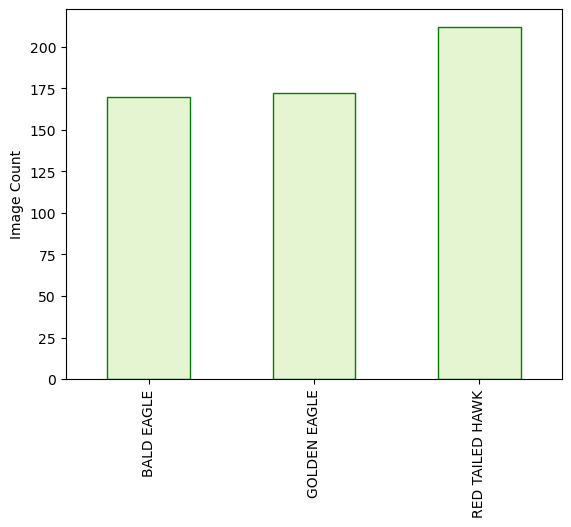

In [5]:
#Prepare data
barplot_data = bird_data
species_count = barplot_data['labels'].value_counts(sort=False)

plt.xticks(rotation=45)
plt.ylabel('Image Count')
species_count.plot(kind='bar', color=(0.5, 0.8, 0.1, 0.2), edgecolor='green')

print(species_count)

## Confusion Matrix

In [6]:
#Load chosen model (MobilenetV3)
model = tf.keras.models.load_model('./models/mn_model.h5')

In [7]:
classes=labels #All classes/labels
batch_size=32 #Batch size is 32 since we are working with a smaller amount of images
target_size=(224,224) #All images will be resized to 224 x 224

#ImageDataGenerator
bird_image_datagen = ImageDataGenerator(dtype = 'float32', preprocessing_function=preprocess_input)

#Flow training images in batches using the generator
train_generator = bird_image_datagen.flow_from_directory(
        bird_train_directory,  #This is the source directory for training images
        target_size=target_size,
        batch_size=batch_size,
        shuffle=True,
        #Specify the classes explicitly
        classes = classes,
        #Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# Flow testing images in batches using the generator
test_generator = bird_image_datagen.flow_from_directory(
        bird_test_directory,  #This is the source directory for testing images
        target_size=target_size,
        batch_size=batch_size,
        shuffle=False,
        class_mode='categorical')

Found 524 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


1/1 [==============================] - 3s 3s/step
Confusion Matrix
Normalized confusion matrix
Classification Report
                 precision    recall  f1-score   support

     BALD EAGLE       1.00      1.00      1.00         5
   GOLDEN EAGLE       1.00      0.60      0.75         5
RED TAILED HAWK       0.71      1.00      0.83         5

       accuracy                           0.87        15
      macro avg       0.90      0.87      0.86        15
   weighted avg       0.90      0.87      0.86        15



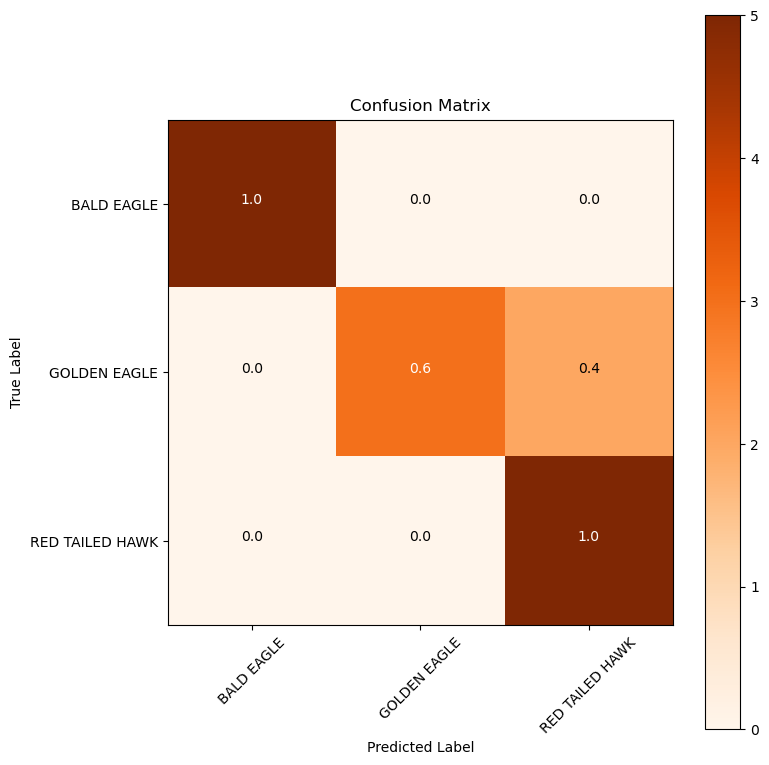

In [8]:
#Plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    
    title = "Confusion Matrix"
    normalize = True
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap="Oranges")
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

#Print the Target names
shuffle=False
target_names = []

for key in train_generator.class_indices:
    target_names.append(key)

#Confusion Matrix
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')

cm = metrics.confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names)

#Print Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))